<a href="https://colab.research.google.com/github/muthu-anushya/Group-5-AI-Session/blob/main/datadownload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install -q kaggle

In [11]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d odins0n/ucf-crime-dataset

100% 11.0G/11.0G [01:06<00:00, 170MB/s]
100% 11.0G/11.0G [01:06<00:00, 179MB/s]


In [6]:
!unzip /content/ucf-crime-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
xtrain = train_datagen.flow_from_directory('/content/Train',
                                           target_size =(64,64),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 1266345 images belonging to 14 classes.


In [14]:
xtest = test_datagen.flow_from_directory('/content/Test',
                                           target_size =(64,64),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 111308 images belonging to 14 classes.


In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [16]:
model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

In [17]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [18]:



model.fit_generator(Xtrain,steps_per_epoch=len(Xtrain),
                    epochs=10,validation_data=Xtest,validation_steps=len(Xtest))

NameError: ignored

In [19]:

# Save model

model.save('/content/Test/Train/Arrest/Arrest002_x264_1000.png')

In [20]:
#Testing the model

from tensorflow.keras.preprocessing import image
import numpy as np


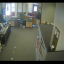

In [22]:

# Testing 1

img = image.load_img('/content/Test/Arrest/Arrest001_x264_1010.png',target_size =(64,64))
img

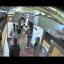

In [23]:
img = image.load_img('/content/Test/Fighting/Fighting003_x264_1030.png',target_size =(64,64))
img

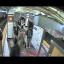

In [24]:
img = image.load_img('/content/Test/Fighting/Fighting003_x264_1070.png',target_size =(64,64))
img

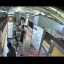

In [25]:
img = image.load_img('/content/Test/Fighting/Fighting003_x264_1190.png',target_size =(64,64))
img

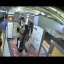

In [26]:
img = image.load_img('/content/Test/Fighting/Fighting003_x264_720.png',target_size =(64,64))
img

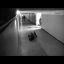

In [27]:
img = image.load_img('/content/Test/Fighting/Fighting018_x264_600.png',target_size =(64,64))
img

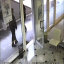

In [28]:
img = image.load_img('/content/Test/Fighting/Fighting042_x264_280.png',target_size =(64,64))
img

In [29]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 1s 508ms/step


'bears'

In [ ]:
img = image.load_img('/content/Test/Train/Arrest/Arrest002_x264_1000.png',target_size =(64,64))
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 20ms/step


'elephants'

In [ ]:
# Testing 3

img = image.load_img('/content/Test/Train/Arrest/Arrest002_x264_1000.png',target_size =(64,64))
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 21ms/step


'elephants'

1/1 [==============================] - 0s 21ms/step


'elephants'

In [ ]:
# Testing 4

img = image.load_img('/content/Test/Train/Arrest/Arrest002_x264_1060.png',target_size =(64,64))
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index


1/1 [==============================] - 0s 20ms/step


In [39]:
train_dir="/content/Train"

In [34]:
test_dir="/content/Test"

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout,MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.models import Sequential
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [31]:
SEED = 12
IMG_HEIGHT=64
IMG_WIDTH=64
BATCH_SIZE=128
EPOCHS=5
LR=0.00003


In [36]:

crime_types=os.listdir(train_dir)
n=len(crime_types)
print("Number of crime categories:",n)

Number of crime categories: 14


In [40]:
train_dir="/content/Train"

In [43]:
crimes={}
train=test=0
for clss in crime_types:
  num=len(os.listdir(os.path.join(train_dir,clss)))
  train+=num
  test+=len(os.listdir(os.path.join(test_dir,clss)))
  crimes[clss]=num

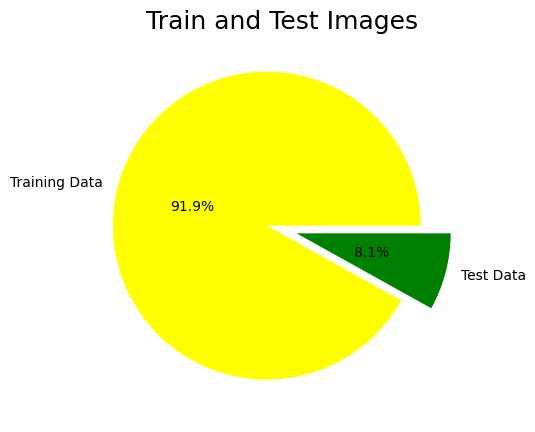

In [44]:
plt.figure(figsize=(8,5))
plt.pie(x=np.array([train,test]),autopct="%.1f%%",explode=[0.1,0.1],labels=["Training Data","Test Data"],pctdistance=0.5,colors=['yellow','green'])
plt.title("Train and Test Images",fontsize=18);



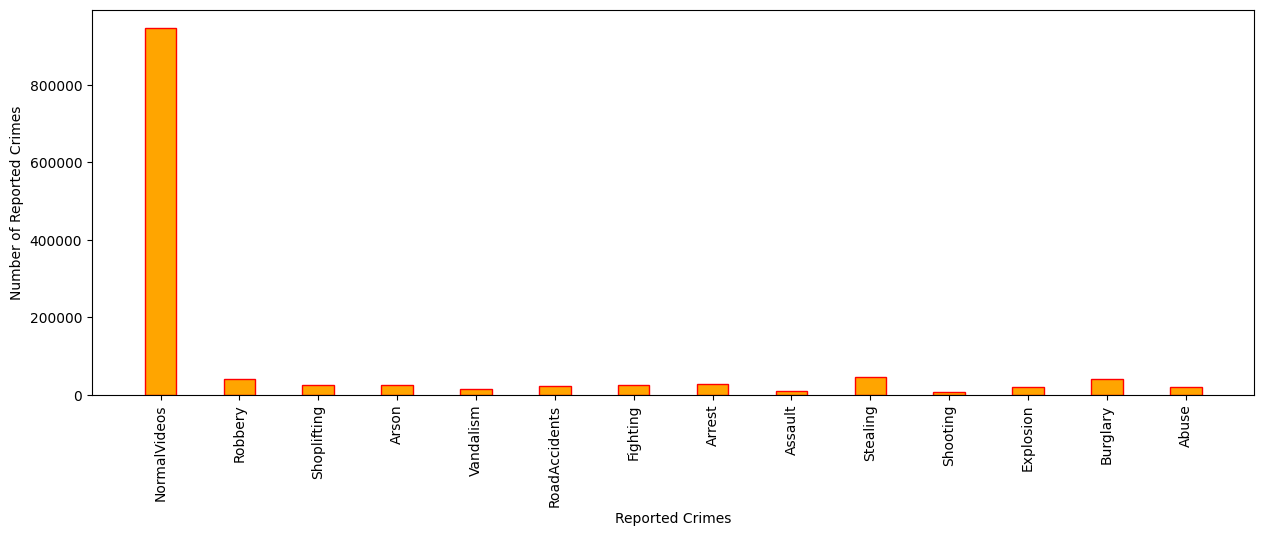

In [45]:
plt.figure(figsize=(15,5))
plt.bar(list(crimes.keys()),list(crimes.values()),width=0.4,align="center",edgecolor=['red'],color=['orange'])
plt.xticks(rotation=90)
plt.xlabel("Reported Crimes")
plt.ylabel("Number of Reported Crimes")
plt.show()

In [47]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)


NameError: ignored